# Configuracoes

In [374]:
%pip install opencv-python
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [375]:
# Import opencv
import cv2 
# Import matplotlib
import matplotlib.pyplot as plt

In [376]:
#Config da rede neural e seus pesos
config_file = 'config_file.pbtxt'
frozen_model = 'frozen_model.pb'

In [377]:
#Cria um modelo de deteccao de objetos
model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [378]:
#Configura tamanho, escala e cor das imagens
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 000001C688CDFAB0>

In [379]:
#Configura as labels de possiveis resultados
classLabels = []
with open('Labels.txt','rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')

In [380]:
#Mostra as labels
print(classLabels)


['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', '', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', '', 'backpack', 'umbrella', '', '', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', '', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', '', 'diningtable', '', '', 'toilet', '', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', '', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


# Identificando imagem 

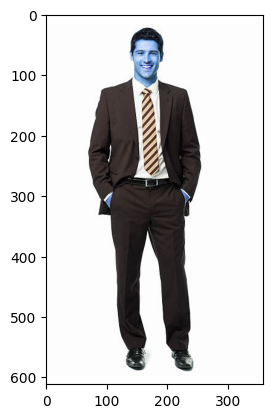

In [381]:
#Printando a imagem no padrao BGR(Padrao OpenCV)
img = cv2.imread('gravata.jfif')
plt.imshow(img)

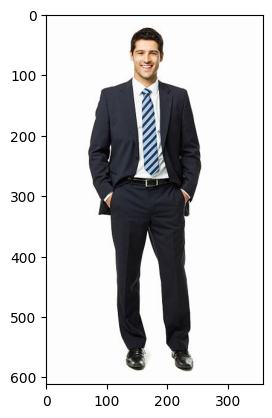

In [382]:
#Convertendo para RGB
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 

In [383]:
ClassIndex, confidece, bbox =model.detect(img,confThreshold = 0.4)

In [384]:
print(ClassIndex)
print(confidece)

[ 1 32]
[0.8243244  0.73141783]


In [385]:
#Configura a marcacao(tamanho da fonte e etc)
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0), 2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale = 2,color=(0,255,0), thickness =2)

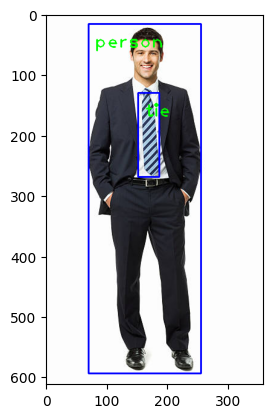

In [386]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
